### Imports

In [1]:
import os

from scrape import get_url, scrape_links, download_images
from data_preparation import load_data, split_dataset_into_train_val_test, get_dataloader
from CNN import CNN
from train import train, evaluate
from plot import plot_loss, plot_predictions_histogram, plot_image_examples

/data/localhost/chinery/miniconda3/envs/moo/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Paths

In [2]:
src_dir = os.path.abspath("")
root_dir = os.path.dirname(src_dir)
data_dir = os.path.join(root_dir, "data")

### Scrape Google for images

In [3]:
for query in ["butter", "margarine"]:

    img_directory = os.path.join(data_dir, query)
    if not os.path.exists(img_directory):
        os.makedirs(img_directory)

    url = get_url(query)
    links = scrape_links(url)
    download_images(links, img_directory)

21it [00:00, 27.62it/s]


21it [00:00, 30.97it/s]


### Load data

In [4]:
val_pc, test_pc, batch_size = 0.2, 0.2, 8

In [5]:
dataset = load_data(data_dir)  
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset_into_train_val_test(dataset, val_pc, test_pc)

train_dl = get_dataloader(X_train, y_train, batch_size=batch_size)
val_dl = get_dataloader(X_val, y_val, batch_size=batch_size)
test_dl = get_dataloader(X_test, y_test, batch_size=batch_size)

print(f"Image data shape: \t{X_test[0].shape}\n")
print(f"Train set size:\t{len(X_train)}")
print(f"Val set size:\t{len(X_val)}")
print(f"Test set size:\t{len(X_test)}")

Image data shape: 	torch.Size([3, 150, 150])

Train set size:	24
Val set size:	9
Test set size:	9


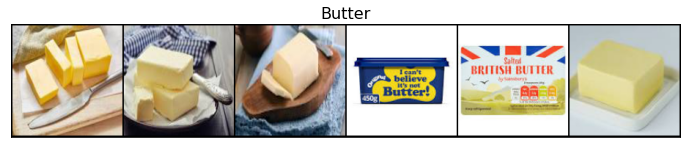

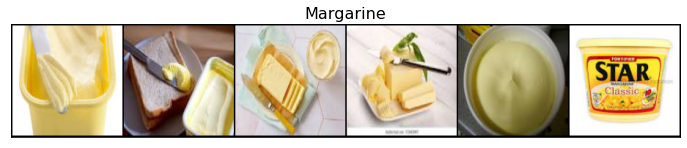

In [6]:
plot_image_examples(X_train, y_train, "butter", dataset.class_to_idx, nrow=6, max_images=6)
plot_image_examples(X_train, y_train, "margarine", dataset.class_to_idx, nrow=6, max_images=6)

### CNN

In [7]:
net = CNN()
net

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=21904, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

### Train

In [8]:
epochs, patience = 100, 30

In [9]:
best_net, train_loss_record, val_loss_record = train(net, train_dl, val_dl, epochs=epochs, patience=patience)

 71%|█████████████████████████████████████████████████████████████████████████████████████▏                                  | 71/100 [00:21<00:08,  3.32it/s]


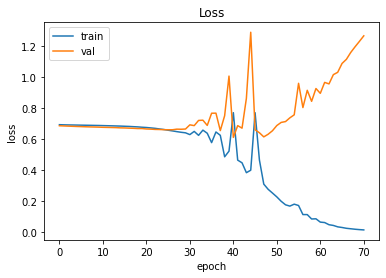

In [10]:
plot_loss(train_loss_record, val_loss_record)

### Evaluate

In [11]:
labels, preds = evaluate(best_net, test_dl)

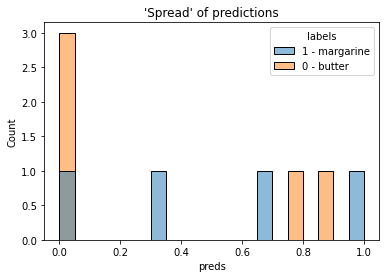

In [12]:
plot_predictions_histogram(labels, preds, dataset.class_to_idx, bins=20)